# Assignment Day 11 | 20th July 2020

#### Junior Peña

Using the Attrition dataset, analyse each column (if possible) to know if it has correlation with the Attrition.

First, we are going to import pandas and use the function .read_csv to upload the document.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\junio\\Day 11\\general_data.csv")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


After this, we have to convert the values in the Attrition column to integer using the '.map' function. Analyzing the data, we saw that the variables in the column 'Gender' are strings, so we are going to convert those values to integers as well because this could be an important value for correlation.

In [3]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [4]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,0,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,0,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,1,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,1,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


We can now check if there are any null values in each row. If there are null value, we are going to use the '.dropna' function to remove them as this can affect the results calculation and visualizing the correlation.

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Doing a further inspectin to the data, we saw that the columns of 'EmployeeCount' and 'StandardHours' have the same repetitive value in each of them, so we are going to remove them as this has no real impact in defining the correlation.

In [8]:
df = df.drop(['EmployeeCount', 'StandardHours'], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,0,1,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,2,0,1,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,3,1,4,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,4,1,3,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,5,1,1,...,23420,4.0,Y,12,2,9.0,2,6,0,4


We can now beging analyzing the correlation by importing the following libraries.

In [9]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

Plotting a heatmap, we can have a general idea of how each variable is correlated to Attrition. The darker the color, the more correlated the variable is.

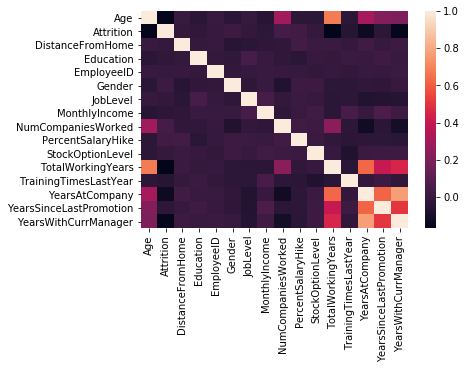

In [10]:
corr = df.corr()
sb.heatmap(corr)

We can do a more detailed calculation by obtaining the r and p value of each variable.

#### Attrition - Age correlation

As the result bellow states, Age has a significant correlation with Attrition, because the p value is bellow 0.05.

In [11]:
stats, p = pearsonr(df.Attrition, df.Age)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.15839867954096706 
The p value is:  5.1265982193780794e-26
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - DistanceFromHome correlation

As the result bellow states, the distance from home has no significant correlation with Attrition, because the p value is above 0.05.

In [12]:
stats, p = pearsonr(df.Attrition, df.DistanceFromHome)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.009448638515156243 
The p value is:  0.5317715668019558
The null hypothesis is accepted, so there is no significant correlation between both variables.


#### Attrition - Education correlation

As the result bellow states, Education has no significant correlation with Attrition, because the p value is above 0.05.

In [13]:
stats, p = pearsonr(df.Attrition, df.Education)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.017106307050278727 
The p value is:  0.25757539308157945
The null hypothesis is accepted, so there is no significant correlation between both variables.


#### Attrition - Gender correlation

As the result bellow states, Gender has no significant correlation with Attrition, because the p value is above 0.05.

In [14]:
stats, p = pearsonr(df.Attrition, df.Gender)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  0.01839642519444095 
The p value is:  0.22339966086831062
The null hypothesis is accepted, so there is no significant correlation between both variables.


#### Attrition - JobLevel correlation

As the result bellow states, the job level has no significant correlation with Attrition, because the p value is above 0.05.

In [15]:
stats, p = pearsonr(df.Attrition, df.JobLevel)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.012381569720790865 
The p value is:  0.4125489150380087
The null hypothesis is accepted, so there is no significant correlation between both variables.


#### Attrition - MonthlyIncome correlation

As the result bellow states, monthly income has a significant correlation with Attrition, because the p value is bellow 0.05.

In [16]:
stats, p = pearsonr(df.Attrition, df.MonthlyIncome)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.030160293808460668 
The p value is:  0.045890862744719166
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - NumCompaniesWorked correlation

As the result bellow states, the total number of companies the employee has worked for has a significant correlation with Attrition, because the p value is bellow 0.05.

In [17]:
stats, p = pearsonr(df.Attrition, df.NumCompaniesWorked)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  0.042830567244720875 
The p value is:  0.004572057121620842
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - PercentSalaryHike correlation

As the result bellow states, the percent salary hike for last year has a significant correlation with Attrition, because the p value is bellow 0.05.

In [18]:
stats, p = pearsonr(df.Attrition, df.PercentSalaryHike)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  0.03315303713546665 
The p value is:  0.028192446935106235
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - StockOptionLevel correlation

As the result bellow states, the stock option level of the employee has no significant correlation with Attrition, because the p value is above 0.05.

In [19]:
stats, p = pearsonr(df.Attrition, df.StockOptionLevel)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.008164026684984324 
The p value is:  0.588999635831226
The null hypothesis is accepted, so there is no significant correlation between both variables.


#### Attrition - TotalWorkingYears correlation

As the result bellow states, the total number of years the employee has worked has a significant correlation with Attrition, because the p value is bellow 0.05.

In [20]:
stats, p = pearsonr(df.Attrition, df.TotalWorkingYears)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.16966991684723917 
The p value is:  1.1645434967091854e-29
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - TrainingTimesLastYear correlation

As the result bellow states, the number of times training was conducted for the employee last year has a significant correlation with Attrition, because the p value is bellow 0.05.

In [21]:
stats, p = pearsonr(df.Attrition, df.TrainingTimesLastYear)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.04758573693081737 
The p value is:  0.0016276603635477602
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - YearsAtCompany correlation

As the result bellow states, the total number of years spent at the company by the employee has a significant correlation with Attrition, because the p value is bellow 0.05.

In [22]:
stats, p = pearsonr(df.Attrition, df.YearsAtCompany)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.13300261842521538 
The p value is:  9.476118084840815e-19
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - YearsSinceLastPromotion correlation

As the result bellow states, the number of years since last promotion has a significant correlation with Attrition, because the p value is bellow 0.05.

In [23]:
stats, p = pearsonr(df.Attrition, df.YearsSinceLastPromotion)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.03142315056330995 
The p value is:  0.03752293607395154
The null hypothesis is rejected, so there is significant correlation between both variables.


#### Attrition - YearsWithCurrManager correlation

As the result bellow states, the number of years under current manager has a significant correlation with Attrition, because the p value is bellow 0.05.

In [24]:
stats, p = pearsonr(df.Attrition, df.YearsWithCurrManager)
print("The r value is: ", stats, "\nThe p value is: ", p)

if(p < 0.05):
    print("The null hypothesis is rejected, so there is significant correlation between both variables.")
else:
    print("The null hypothesis is accepted, so there is no significant correlation between both variables.")

The r value is:  -0.15469153690287274 
The p value is:  7.105369646771178e-25
The null hypothesis is rejected, so there is significant correlation between both variables.


### Conclusion

As we saw, the following variable are the ones with significant correlation to the Attrition:
- Age
- Monthly Income
- Number of companies worked
- Percent salary hike
- Total working years
- Training times last year
- Years at company
- Years since last promotion
- Years with current manager